In [1]:
# Pizza data
import pandas as pd
import numpy as np
from scipy import stats as st                 
from matplotlib import pyplot as plt
import os  

pizza_delivery = pd.read_excel('F:\Skillenable\Data frames\pizza delivery.xlsx')
pizza_delivery

,Electronics City,MG Road,Whitefield
0,NaN,NaN,NaN
1,29.0,32.0,25.0
2,27.0,33.0,24.0
3,30.0,31.0,24.0
4,27.0,34.0,25.0
5,28.0,30.0,26.0


In [2]:
# 1.Compute Mean, Median, Standard deviation, Inter Quartile Range and Range for above data

pizza_delivery.mean()

Electronics City    28.2
MG Road             32.0
Whitefield          24.8
dtype: float64

In [3]:
pizza_delivery.median()

Electronics City    28.0
MG Road             32.0
Whitefield          25.0
dtype: float64

In [4]:
varience = pizza_delivery.var()
varience

Electronics City    1.7
MG Road             2.5
Whitefield          0.7
dtype: float64

In [5]:
pizza_delivery.describe()

,Electronics City,MG Road,Whitefield
count,5.00000,5.000000,5.00000
mean,28.20000,32.000000,24.80000
std,1.30384,1.581139,0.83666
min,27.00000,30.000000,24.00000
25%,27.00000,31.000000,24.00000
50%,28.00000,32.000000,25.00000
75%,29.00000,33.000000,25.00000
max,30.00000,34.000000,26.00000


In [6]:
np.std(pizza_delivery) 

Electronics City    1.166190
MG Road             1.414214
Whitefield          0.748331
dtype: float64

In [7]:
# range 
min = np.min(pizza_delivery)
max = np.max(pizza_delivery)
print(min)
print(max)
print(max-min)

Electronics City    27.0
MG Road             30.0
Whitefield          24.0
dtype: float64
Electronics City    30.0
MG Road             34.0
Whitefield          26.0
dtype: float64
Electronics City    3.0
MG Road             4.0
Whitefield          2.0
dtype: float64


In [8]:
# 2.Compare the summary statistics of three outlets. 
# What is your inference?


## ## let confidence value = 90%, significance level = 0.010

Electronics_city = pizza_delivery['Electronics City']
Electronics_city



0     NaN
1    29.0
2    27.0
3    30.0
4    27.0
5    28.0
Name: Electronics City, dtype: float64

In [9]:
## creating data set for MG road

MG_road = pizza_delivery['MG Road']
MG_road

0     NaN
1    32.0
2    33.0
3    31.0
4    34.0
5    30.0
Name: MG Road, dtype: float64

In [10]:
## creating data set Whitefield

Whitefield = pizza_delivery['Whitefield']
Whitefield

0     NaN
1    25.0
2    24.0
3    24.0
4    25.0
5    26.0
Name: Whitefield, dtype: float64

In [11]:
# perform ANOVA test; 

st.f_oneway(Electronics_city,MG_road,Whitefield)


F_onewayResult(statistic=nan, pvalue=nan)

In [12]:
# Failing to perform test; pvalue is nan.

In [13]:

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#


# HR Data set 

     a. 10 positions which are paid the least, create a bar plot

     b. Most satisfied and least satisfied department

     c. Which department has highest variation in employee satisfaction

     d. Are Engagement Survey Score and Employee Satisfaction Scores impacted by the employees’ Pay Rate.


In [35]:
hr_data = pd.read_excel('F:\Skillenable\Data frames\HRDataset-3.xlsx')
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,38
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,46
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,33
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,33
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,32


In [15]:
 # a. 10 positions which are paid the least, create a bar plot

least_paid = hr_data.groupby('Position')[['Salary']].mean().reset_index().nsmallest(10, columns=['Salary'], keep = 'first')

least_paid

,Position,Salary
1,Administrative Assistant,52280.000000
22,Production Technician I,55524.175182
18,Network Engineer,61605.000000
0,Accountant I,63507.666667
17,IT Support,63684.375000
23,Production Technician II,64892.210526
2,Area Sales Manager,64932.555556
24,Sales Manager,69240.000000
21,Production Manager,75294.500000
28,Software Engineering Manager,77692.000000


In [16]:
positions = least_paid['Position'].tolist()

In [17]:
salary = least_paid['Salary'].tolist()

<BarContainer object of 10 artists>

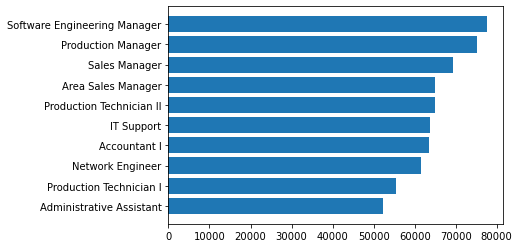

In [18]:
plt.barh(positions, salary)


In [19]:
# b. Most satisfied and least satisfied department


most_sat = hr_data.groupby('Department')[['EmpSatisfaction']].mean().reset_index().sort_values(by=['EmpSatisfaction'], ascending=False)
most_sat.head(1)

,Department,EmpSatisfaction
5,Software Engineering,4.090909


In [20]:
least_sat = hr_data.groupby('Department')[['EmpSatisfaction']].mean().reset_index().sort_values(by=['EmpSatisfaction'], ascending=True)
least_sat.head(1)

,Department,EmpSatisfaction
1,Executive Office,3.0


In [38]:
#   c. Which department has highest variation in employee satisfaction

emp_sat =hr_data.groupby('Department')[['EmpSatisfaction']].mean().reset_index()
emp_sat


,Department,EmpSatisfaction
0,Admin Offices,3.555556
1,Executive Office,3.000000
2,IT/IS,3.960000
3,Production,3.861244
4,Sales,4.032258
5,Software Engineering,4.090909


In [40]:
emp_sat.var()

C:\Users\arun\AppData\Local\Temp/ipykernel_14668/315597790.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  emp_sat.var()


EmpSatisfaction    0.170534
dtype: float64